# 6. Style and Timing

## 6.1 Style

> "Any code of your own that you haven't looked at for six or more months might as well have been written by someone else." - Eagleson's law


So far we've discussed code as a way to communicate with a machine. Functionally this is the purpose of writing code. However, as with any writing, code is also meant to communicate with other humans, and the best programmers don't write code for computers, they write code for humans.

To encourage good style practices, Python has developed its own set of rules for writing good, readable code. This is known as the **Python style guide**, and you can find all the details at the [Python website](https://www.python.org/dev/peps/pep-0008/)

We'll go over some basic rules for good code, but in general, the best way you can learn to write better code is to look at how experts write code. A good way to do this is to go on github and look at the source code for some of the most popular Python packages, such as [Keras](https://github.com/keras-team/keras/tree/master/keras) and [scikit-learn](https://github.com/scikit-learn/scikit-learn/tree/master/sklearn) 

### Make your names useful

In [1]:
import numpy as np

In [2]:
def f():
    return None

def return_none():
    return None

These functions do exactly the same thing, but which one is better? Always the one with a name that tells the user (who is usually you) what the function does. The same goes with variables and arguments...

In [3]:
def f(x, a, b):
    return a + b * x

def linear_function(x_values, intercept, slope):
    return intercept + slope * x_values

Which one is better? Again, the one with the useful names. Always name things so that the person using the code (you) knows whats happening. This also makes it easier to search for specific parts of your code, try using <kbd>command</kbd>+<kbd>F</kbd> (Mac) or <kbd>ctrl</kbd>+<kbd>F</kbd> (Windows/Linux) and find `a` in the notebook. Then find `intercept`. Much easier, right?

### Keep your code concise
> "Measuring programming progress by lines of code is like measuring aircraft building progress by weight" - Bill Gates

In [4]:
def check_threshold(value, threshold):
    if value > threshold:
        return True
    else:
        return False

def check_threshold(value, threshold):
    return value > threshold

Again, these functions do the same thing, but the one with fewer lines of code is better because it's easier to read.

### Write your code so it doesn't need explanation


In [8]:
def multiply(values):
    # values is a list, so we need to split them
    # and then multiply them together
    return values[0] * values[1] 

def multiply(x1, x2):
    return x1 * x1


The second version is better because we don't need to explain what the function is doing. The syntax makes it clear.

## 6.2 Comments, and Documentation

### 6.2.1 Comments
>"Commenting your code is like cleaning your bathroom - you never want to do it, but it really does create a more pleasant experience for you and your guests." - Ryan Campbell

Comments in Python can be used by adding a `#` before a line of text. This tells Python to ignore whatever text is after the `#`. In general, you should always strive to write your code so it doesn't need comments, but sometimes they are simply unavoidable. Let's go over some examples.

Here is a bad use of a comment...

In [6]:
age = 25 # set the value of age

This is a bad comment because it's already clear from the code what is happening. A good rule for writing comments is that *the comment should explain **why** you are doing something* rather than **what** you are doing. Here is a good example...

In [7]:
x = np.array([0, 1, 2, 3, 5]).astype(float) # otherwise numpy returns integers
x[x == 0] = 1e-16 # avoid log(0)
log_x = np.log(x) 

In this case it's already clear from the code **what** we are doing, but it might not be obvious **why** we are doing it. This is where comments are the most useful.

### 6.2.1 Docstrings

In the case of functions, because all of the details are hidden, it's useful to provide what is known as a **"documentation string"** or **"docstring"** for short. In general these are triple strings `"""Here is my docstring"""` written after the function name to explain what the function does, what the arguments do, and what the function returns. Here is an example from one of my own projects...

In [132]:
def tag_template(max_side):
    """
    Create a template for extracting barcode pixels using affine transform.

    Parameters
    ----------
    max_side : int
        The size of the template in pixels
    Returns
    -------
    template : array_like
        A template for storing extracted barcode pixels.

    """

    length = max_side - 1
    template = np.array([[0, 0],
                        [length, 0],
                        [length, length],
                        [0, length]],
                        dtype=np.float32)

    return template

While you probably have no idea what this function is used for, you can see this is a useful docstring. It tells the user what the inputs to the function are, what the function does, and what it returns. We can access this directly from the function object like so...

In [136]:
print(tag_template.__doc__)


    Create a template for extracting barcode pixels using affine transform.

    Parameters
    ----------
    max_side : int
        The size of the template in pixels
    Returns
    -------
    template : array_like
        A template for storing extracted barcode pixels.

    


Docstrings are also available in numpy...

In [137]:
print(np.linspace.__doc__)


    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].

    The endpoint of the interval can optionally be excluded.

    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bool, optional
        If True, return (`samples`, `step`), where `step` is the spacing
        between samples.
    dtype : dtype, optional
       

However we can also more conveniently access this in jupyter using <kbd>shift</kbd>+<kbd>tab</kbd> when the cursor is inside the parenthesis...

In [ ]:
np.linspace(# put your cursor here and press shift+tab

You can also access this information using the `?` operator like so...

In [135]:
#this will bring up a box in the bottom of your screen with the docstring
np.linspace?

You should get in the habit of writing docstrings for your functions. This makes it easy for you to remember in the future exactly what your code is doing. Docstrings are typically available in all of the popular Python packages, so take advantage of them when you're programming!

## 6.3 Computational complexity

>"Debugging time increases as a square of the program’s size." - Chris Wenham

So far we've mostly worked with toy examples. In other words, our examples have been small and they run fast. However, at some point you will reach the limits of what is possible with your current machine, and this is where having a good understanding of **computational complexity** comes into play. 

Not all algorithms are built the same, and, in general, algorithms can be described in terms of the computation time they need to run and the amount of memory they need to make the computation. These two properties are known as **"time complexity"** and **"memory (or space) complexity"** respectively.

The complexity of an algorithm (typically a function) with respect to computation and memory are typically described using what is called **"big O notation"**. This is just a way of describing the complexity of the algorithm in regard to the time or required memory it needs to perform the computation for various input sizes. Where a notation like $O(n^2)$ means that the function requires squared computational time or memory space as a function of the input size $n$.

Let's look at a classic example of coamputational complexity, the *pairwise distance function*. Here we want to calculate pairwise distances for all the rows in an array using the following equation:
   
   $$ \sqrt{\sum{(x - y)^2}} $$
   
where $x$ and $y$ are $d$ dimensional vectors.

In this example, we have a $n\times d$ matrix $X$ which is a a set of $n$ vector coordinates with $d$ dimensions, and we want to know the Euclidean distance between each vector $x_{i} \in X$ and all the other vectors $x_{j} \in X$ for $i,j = 0,1,2,3...,n$ where $j \neq i$. Our distances calculations should then produce the $n\times n$ matrix $D$, which contains all the pairwise distances between vectors with zeros along the diagonal.

Naively we can do this with a nested for loop...

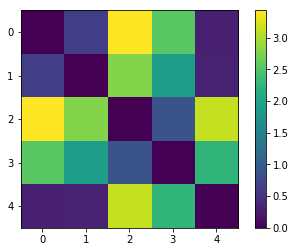

In [138]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
d = 1
X = np.random.normal(size=(n, d))

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def loop_pairwise_distances(X):
    n = X.shape[0]
    D = np.zeros((n, n))
    for idx in range(n):
        for jdx in range(n):
            D[idx, jdx] = distance(X[idx], X[jdx])
    return D

D = loop_pairwise_distances(X)

plt.figure()
plt.imshow(D)
plt.colorbar()
plt.show()

Notice that this pairwise distance algorithm has low memory complexity as we are only calculating a single distance at a time, but there is very high time complexity as we are having to do many operations sequentially—$O(n^2)$ computations in this case. In fact, just for good measure, let's time our function to see how long it takes to run. We can do this with some jupyter magic using the `%timeit` command...

In [ ]:
%timeit loop_pairwise_distances(X)

That's not bad, but watch what happens when we increase $n$ and $d$ by an order of magnitude...

In [ ]:
n = 50
d = 10
X = np.random.normal(size=(n, d))
%timeit loop_pairwise_distances(X)

That's getting slower! There must be a better way. Luckily numpy allows us to **vectorize** these computations, which increases our memory complexity, but also decreases our time complexity by parallelizing operations. We can achieve this using **broadcasting** like so...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
d = 1
X = np.random.normal(size=(n, d))

def loop_vectorized_pairwise_distances(X):
    n = X.shape[0]
    D = np.zeros((n, n))
    for idx in range(n):
        distances = (X[idx] - X)**2
        distances = np.sum(distances, axis=1)
        D[idx] = np.sqrt(distances)
    return D

D = loop_vectorized_pairwise_distances(X)

plt.figure()
plt.imshow(D)
plt.colorbar()
plt.show()

In [ ]:
n = 50
d = 10
X = np.random.normal(size=(n, d))
%timeit loop_pairwise_distances(X)
%timeit loop_vectorized_pairwise_distances(X)

 The main difference was replacing our nested loop `for jdx in range(n):` with the broadcasting operation `X[idx] - X`. Let's take a look at what this is doing with a simple example...

In [ ]:
X = np.array([[0, 0, 0],
              [10, 10, 10],
              [100, 100, 100]])

y = np.array([1, 2, 3])

print(X + y)

This should help illustrate what broadcasting does. Instead of having to explicitly specify a loop `for jdx in range(n):`, numpy is smart enough to infer that a loop is required based on the shapes of our two arrays. It then performs the same operations as the loop but in parallel.

Great! Our vectorized version is faster, but what happens when we increase the $d$ by another order of magnitude...

In [ ]:
n = 50
d = 100
X = np.random.normal(size=(n, d))
%timeit loop_vectorized_pairwise_distances(X)

It's slowing down again, but we can speed it up with more vectorization...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
d = 1
X = np.random.normal(size=(n, d))

def fully_vectorized_pairwise_distances(X):
    D = (X[:, np.newaxis] - X)**2
    D = np.sum(D, axis=2)
    D = np.sqrt(D)
    return D

D = fully_vectorized_pairwise_distances(X)

plt.figure()
plt.imshow(D)
plt.colorbar()
plt.show()

Now let's check how fast this is...

In [ ]:
n = 50
d = 100
X = np.random.normal(size=(n, d))
%timeit loop_vectorized_pairwise_distances(X)
%timeit fully_vectorized_pairwise_distances(X)

That's twice as fast! And just to make sure our functions give the same results, let's check this with numpy...

In [ ]:
print(np.allclose(loop_vectorized_pairwise_distances(X), fully_vectorized_pairwise_distances(X)))

Great! We managed to decrease the time complexity of our function with numpy by increasing our memory complexity through parallelization.

However this speed-up comes at a cost. The major change is this piece of code `X - X[:, np.newaxis]` which calculates the pairwise differences using broadcasting. Let's take a closer look by seeing what `X[:, np.newaxis]` does...

In [ ]:
print(X[:, np.newaxis].shape)

By adding a new axis with `np.newaxis` this is equivalent to reshaping the array using `X.reshape(50, 1, 100)`. We can achieve the same result with `X[:, np.newaxis, :]`, but we don't need to extra `:` because numpy is smart enough to figure out that we only want a new axis after the first axis. 

You can see we've added a dimension to our array `X`. In other words our rank 2 array is now a rank 3 array, so when we perform operations with our original array `X`, numpy broadcasts the operation across our new axis like so...

In [ ]:
pairwise_differences = X - X[:, np.newaxis]

But what is numpy doing here? Well, by adding a new axis to our array and using broadcasting we are effectively getting rid of our second loop `for idx in range(n):`. Based on the shapes of our arrays, numpy figures out that we want to do a nested for loop like that in our original function, but it does this in parallel rather than sequentially.

Ok, but then what is the shape of our output? Let's check...

In [104]:
print(pairwise_differences.shape)

(50, 50, 100)


That's a big array! Compared to our pairwise distance matrix which is only $n\times n$, this array is $n\times n \times d$. This means the memory complexity of our vectorized pairwise distance algorithm is actually $O(dn^2)$, which is significantly higher than the memory complexity of our loop function $O(n^2)$. 

On the surface that may not seem like a big difference, but let's see what that means in terms of actual memory usage...

In [105]:
print(pairwise_differences.size / D.size)

10000.0


Yikes! That's a 10,000x increase in memory usage! Just from a simple change in our code.

In general, computational complexity is a constant trade-off between memory complexity and time complexity, and the best strategy ultimately depends on the application. In this case, if you only plan on calculating pairwise distances for small arrays then the vectorized algorithm works great, but if you plan to calculate pairwise distances for much larger arrays then you may quickly run out of memory when using the vectorized version.

Figuring out the right complexity for your algorithm is something you as a programmer will have learn, and often there is no easy solution.

## 6.4 Exercise

So far we've discussed two different ways to calculate pairwise distances. Each method represents one side of the complexity trade-off. However, there is a way to calculate pairwise distances that is *both time efficient and memory efficient*, but it requires some careful thought about the math behind what we're trying to calculate. 

For this excercise it's your job to figure out the algorithm that is faster than our algorithm using for loops but also memory efficient enough to calculate the pairwise distances for a large $10,000\times 1,000$ matrix. This is a case where an $O(n^2)$ algorithm is *required*, and our $O(dn^2)$ algorithm just won't work. However our current $O(n^2)$ algorithm is way too slow, so we need to develop a new one. 

To solve this problem, we need to go back to our distance equation:
$$ \sqrt{\sum{(x - y) ^2}}$$

Here's a hint for how we might make our calculations more efficient. Let's ignore the $\sum{}$ and $\sqrt{}$ for now. We can expand our equation like so...

$$ (x - y)^2 = (x - y)(x - y) = x^2 + y^2 - 2xy$$

therefore:

$$ \sum{(x - y)^2} = \sum{x^2} + \sum{y^2} - 2\sum{xy} $$

and:

$$ \sqrt{\sum{(x - y)^2}} = \sqrt{\sum{x^2} + \sum{y^2} - 2\sum{xy}} $$

Here's another hint. Because $x$ and $y$ are vectors (rows of a matrix), that means $\sum{xy}$ is equivalent to the **dot product**, or:
$$ \sum{xy} = x \cdot y^T$$
where $^T$ indicates a transposed vector. And numpy happens to have a very memory efficient implementation of the dot product `np.dot`

In [106]:
n = 10000
d = 1000
X = np.random.normal(size=(n, d))
print(X.shape)

(10000, 1000)


In [107]:
# don't run this, you'll crash your computer!
# vectorized_pairwise_distances(X) # MEMORY ERROR!

In [108]:
# don't run these, you'll be waiting forever!
# loop_vectorized_pairwise_distances(X)
# loop_pairwise_distances(X)

Here is my solution to the problem, just to show that it's possible to solve...

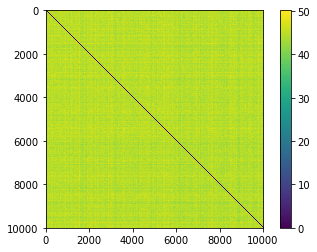

In [109]:
import jakes_secret_module as jake

D = jake.pairwise_distances(X)

plt.imshow(D)
plt.colorbar()
plt.show()

In [110]:
%timeit jake.pairwise_distances(X)

4.99 s ± 375 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Just to prove the results are the same...

In [111]:
n = 5
d = 1
X = np.random.normal(size=(n, d))

print(np.allclose(jake.pairwise_distances(X), loop_pairwise_distances(X)))
print(np.allclose(jake.pairwise_distances(X), vectorized_pairwise_distances(X)))


True
True
